- This is applied when we have skewed data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

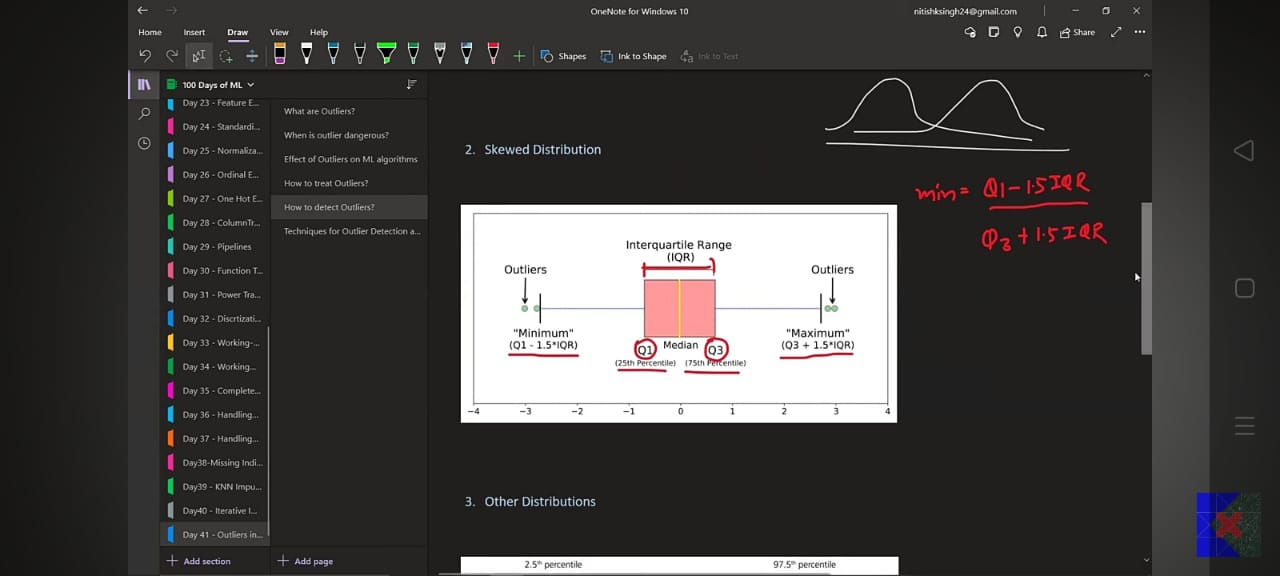

In [35]:
from PIL import Image
Image.open(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\iqr.jpeg")

In [36]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\placement_day42.csv")

In [37]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [38]:
df.shape

(1000, 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11052\2598624692.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],color='r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11052\2598624692.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],color='g')


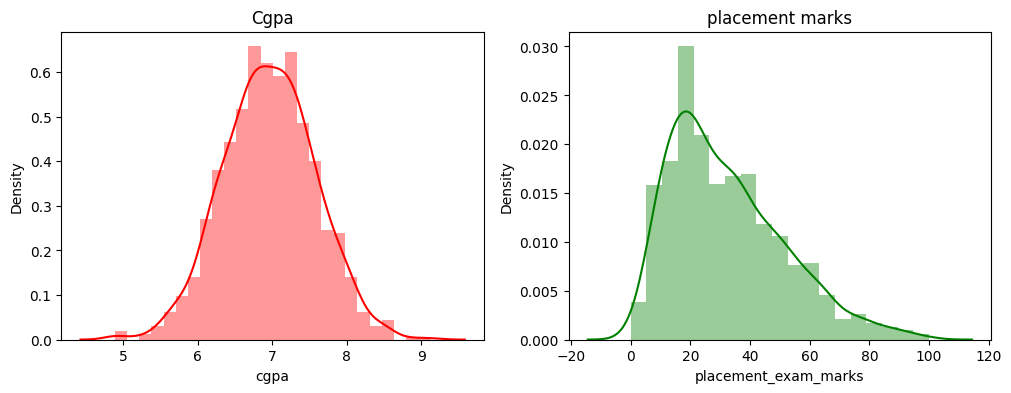

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['cgpa'],color='r')
plt.title("Cgpa")

plt.subplot(122)
sns.distplot(df['placement_exam_marks'],color='g')
plt.title("placement marks")
plt.show()

In [40]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

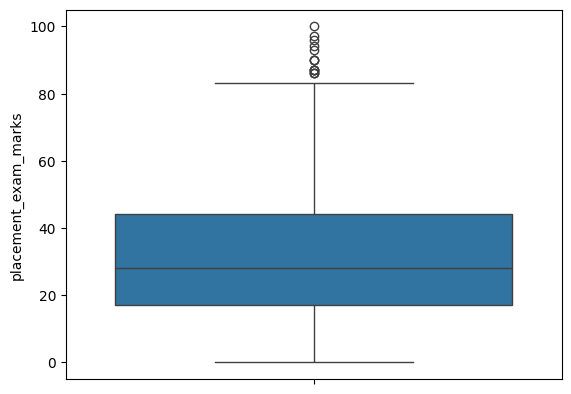

In [41]:
sns.boxplot(df['placement_exam_marks'])

In [42]:
## finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [43]:
percentile25

17.0

In [44]:
percentile75

44.0

In [45]:
iqr = percentile75 - percentile25

In [46]:
iqr

27.0

In [47]:
upper_limit = percentile75 + 1.5* iqr
lower_limit = percentile25 - 1.5*iqr

## Finding Outliers

In [48]:
print("Upper limit is: ",upper_limit)
print("lower limit is:", lower_limit)

Upper limit is:  84.5
lower limit is: -23.5


In [49]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [50]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [51]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [52]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [53]:
new_df.shape

(985, 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11052\279903040.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11052\279903040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


{'whiskers': [<matplotlib.lines.Line2D at 0x245fe6e5850>,
 'caps': [<matplotlib.lines.Line2D at 0x245fe6e5d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x245fe6e56a0>],
 'medians': [<matplotlib.lines.Line2D at 0x245fe6e6330>],
 'fliers': [<matplotlib.lines.Line2D at 0x245fe6e65a0>],
 'means': []}

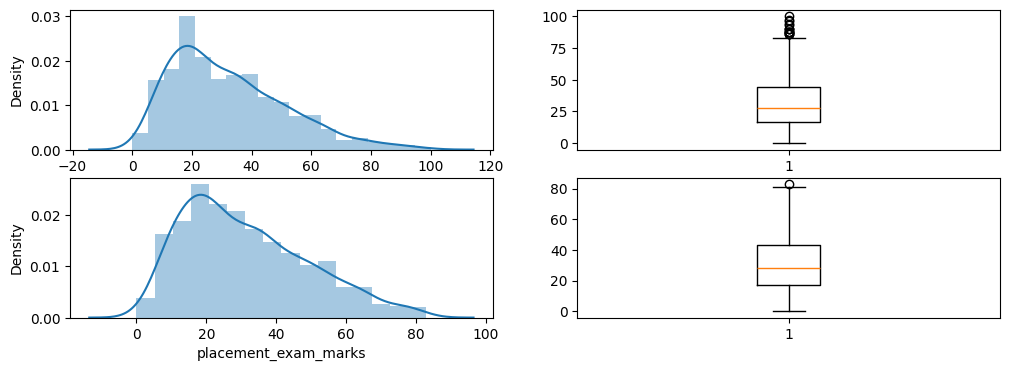

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
plt.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(224)
plt.boxplot(new_df['placement_exam_marks'])

## Capping

In [55]:
new_df_cap = df.copy()

In [56]:
df.shape

(1000, 3)

In [59]:
new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks']>upper_limit,
                                              upper_limit,np.where(new_df_cap['placement_exam_marks']<lower_limit,
                                                                   lower_limit,new_df_cap['placement_exam_marks']))

In [62]:
new_df_cap 

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [63]:
new_df_cap.shape

(1000, 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11052\3538926932.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11052\3538926932.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


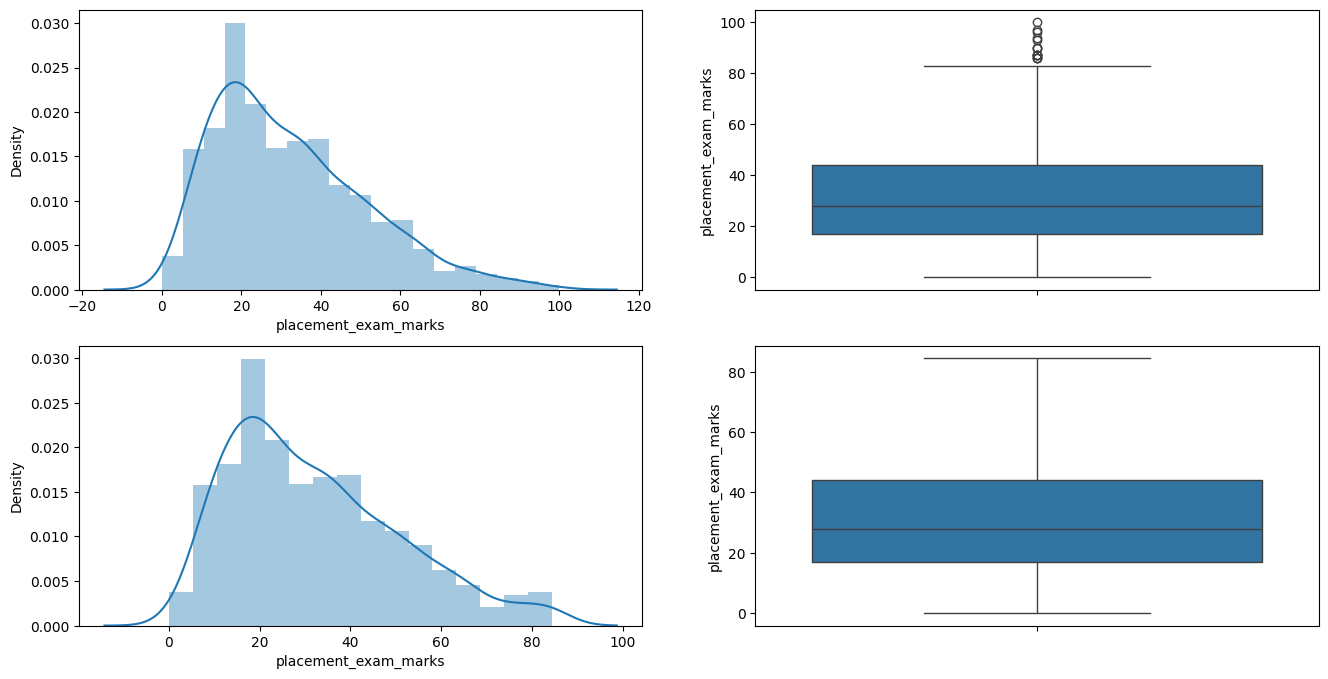

In [64]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()